In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [2]:
%matplotlib inline
# warnings.filterwarnings('ignore')
sns.set()

In [3]:
X_train_df = pd.read_csv('data/X_train.csv').drop(columns=['Unnamed: 0'])
X_test_df = pd.read_csv('data/X_test.csv').drop(columns=['Unnamed: 0'])
y_train_df = pd.read_csv('data/y_train.csv').drop(columns=['Unnamed: 0'])
y_test_df = pd.read_csv('data/y_test.csv').drop(columns=['Unnamed: 0'])

X_train = X_train_df.values
X_test =X_test_df.values
y_train = y_train_df.values.ravel()
y_test =y_test_df.values.ravel()

In [4]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6818, 12), (1705, 12), (6818,), (1705,))

## Candidate model selection

In [5]:
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor, AdaBoostRegressor
import xgboost as xgb
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

In [6]:
models = [(LinearRegression(), "LinearRegression"),
          (Ridge(alpha=0.5), "RidgeRegression"),
          (Lasso(alpha=0.1), "LSSORegression"),
          (DecisionTreeRegressor(), "DecisionTreeRegressor"),
          (RandomForestRegressor(), "RandomForestRegressor"),
          (ExtraTreesRegressor(), "ExtraTreesRegressor"),
          (AdaBoostRegressor(), "AdaBoostRegressor"),
          (xgb.XGBRegressor(), "XGBoost"),
          (SVR(), "SVR"),
          (GradientBoostingRegressor(), "GradientBoostingRegressor")]

In [7]:
def train(model,model_name, X_train= X_train, X_test=X_test, y_train=y_train, y_test=y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    X =  np.vstack([X_train, X_test])
    y = np.concatenate([y_train, y_test])

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    cv_scores_mse = cross_val_score(model,X, y, scoring='neg_mean_squared_error', cv=5)
    cv_score_mse = np.abs(np.mean(cv_scores_mse))
    cv_scores_r2 = cross_val_score(model, X, y , scoring='r2', cv=5)
    cv_score_r2 = np.mean(cv_scores_r2)

    return {"Model":model_name, "Test MSE": mse, "Test R2": r2, "CV MSE": cv_score_mse, "CV R2": cv_score_r2}

In [8]:
performances = []
for model in models:
    print(model[1])
    performances.append(train(*model))

LinearRegression
RidgeRegression
LSSORegression
DecisionTreeRegressor
RandomForestRegressor
ExtraTreesRegressor
AdaBoostRegressor
XGBoost
SVR
GradientBoostingRegressor


In [40]:
models_df = pd.DataFrame(performances)

In [41]:
models_df

,Model,Test MSE,Test R2,CV MSE,CV R2
0,LinearRegression,0.000542,0.727468,0.000541,0.718289
1,RidgeRegression,0.000542,0.727408,0.000541,0.718288
2,LSSORegression,0.001996,-0.002901,0.001926,-0.001916
3,DecisionTreeRegressor,0.001000,0.497733,0.000993,0.483114
4,RandomForestRegressor,0.000534,0.731657,0.000539,0.718885
5,ExtraTreesRegressor,0.000567,0.714852,0.000578,0.700441
6,AdaBoostRegressor,0.000792,0.602202,0.000837,0.580638
7,XGBoost,0.000570,0.713365,0.000564,0.706084
8,SVR,0.003728,-0.873228,0.003792,-0.976738
9,GradientBoostingRegressor,0.000503,0.747298,0.000497,0.740873


In [48]:
models[9][0].get_params()

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [52]:
models[7][0].get_params()

{'objective': 'reg:squarederror',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'device': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': None,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [53]:
models

[(LinearRegression(), 'LinearRegression'),
 (Ridge(alpha=0.5), 'RidgeRegression'),
 (Lasso(alpha=0.1), 'LSSORegression'),
 (DecisionTreeRegressor(), 'DecisionTreeRegressor'),
 (RandomForestRegressor(), 'RandomForestRegressor'),
 (ExtraTreesRegressor(), 'ExtraTreesRegressor'),
 (AdaBoostRegressor(), 'AdaBoostRegressor'),
 (XGBRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_es

In [57]:
models[9][0]

GradientBoostingRegressor()

{'Model': 'GradientBoostingRegressor', 'Test MSE': 0.0005028923584238872, 'Test R2': 0.7472975252344295, 'CV MSE': 0.0004973608923059647, 'CV R2': 0.7408727024984771}


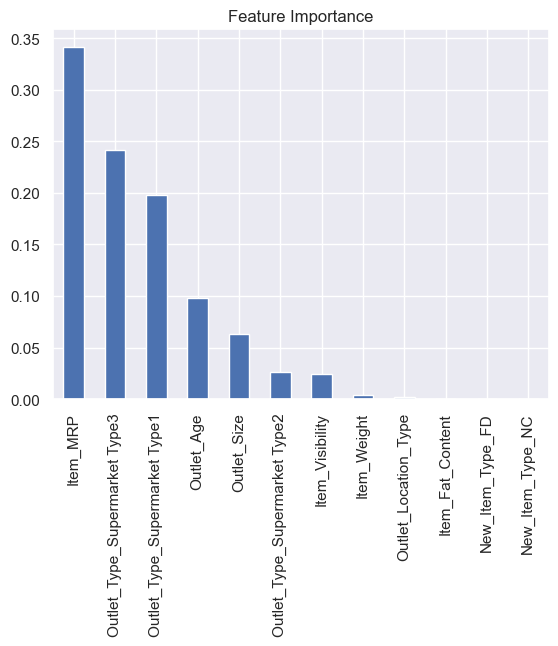

In [78]:
model = models[9][0]
coef = pd.Series(model.feature_importances_, X_train_df.columns).sort_values(ascending=False)
print(performances[9])
coef.plot(kind='bar', title="Feature Importance")
plt.show()

{'Model': 'RandomForestRegressor', 'Test MSE': 0.0005340175830737247, 'Test R2': 0.731657157738492, 'CV MSE': 0.0005389727761089551, 'CV R2': 0.7188847358528075}


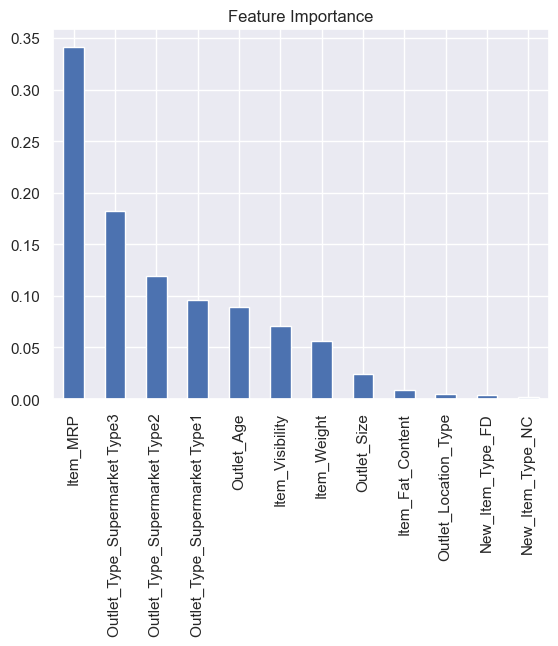

In [73]:
model = models[4][0]
coef = pd.Series(model.feature_importances_, X_train_df.columns).sort_values(ascending=False)
print(performances[4])
coef.plot(kind='bar', title="Feature Importance")
plt.show()

{'Model': 'LinearRegression', 'Test MSE': 0.0005423533095218995, 'Test R2': 0.7274684707021162, 'CV MSE': 0.0005411129657139516, 'CV R2': 0.7182886933230501}


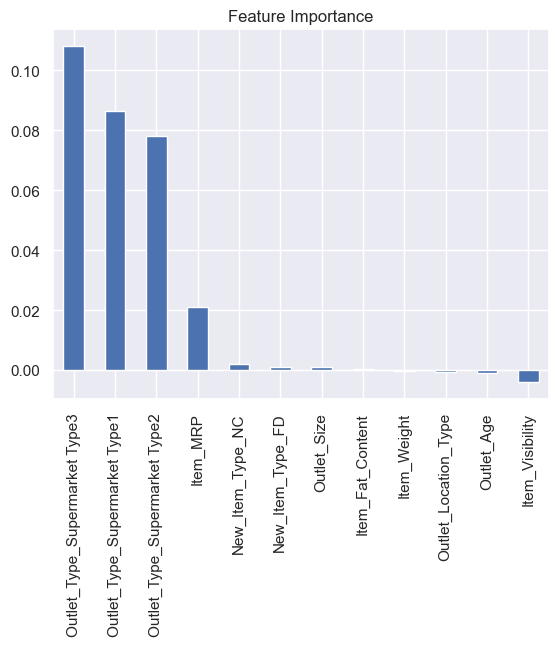

In [74]:
model = models[0][0]
coef = pd.Series(model.coef_, X_train_df.columns).sort_values(ascending=False)
print(performances[0])
coef.plot(kind='bar', title="Feature Importance")
plt.show()

{'Model': 'RidgeRegression', 'Test MSE': 0.0005424745134706705, 'Test R2': 0.7274075659432891, 'CV MSE': 0.0005411165761218505, 'CV R2': 0.7182878865825663}


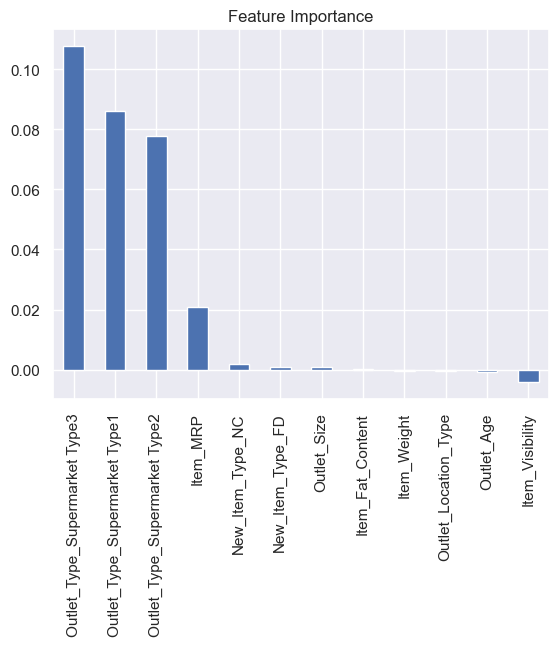

In [75]:
model = models[1][0]
coef = pd.Series(model.coef_, X_train_df.columns).sort_values(ascending=False)
print(performances[1])
coef.plot(kind='bar', title="Feature Importance")
plt.show()

{'Model': 'XGBoost', 'Test MSE': 0.000570419394237126, 'Test R2': 0.7133653153335479, 'CV MSE': 0.0005643791068916652, 'CV R2': 0.7060837685373013}


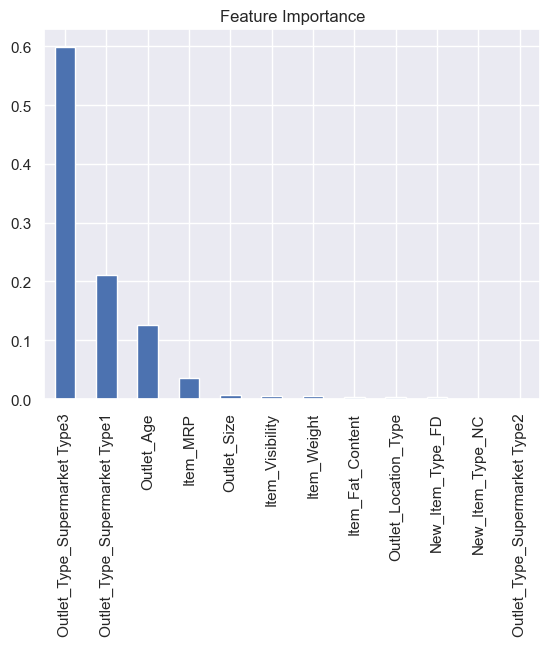

In [76]:
model = models[7][0]
coef = pd.Series(model.feature_importances_, X_train_df.columns).sort_values(ascending=False)
print(performances[7])
coef.plot(kind='bar', title="Feature Importance")
plt.show()

{'Model': 'ExtraTreesRegressor', 'Test MSE': 0.0005674601356421213, 'Test R2': 0.7148523372735365, 'CV MSE': 0.0005775543305865441, 'CV R2': 0.7004414895435644}


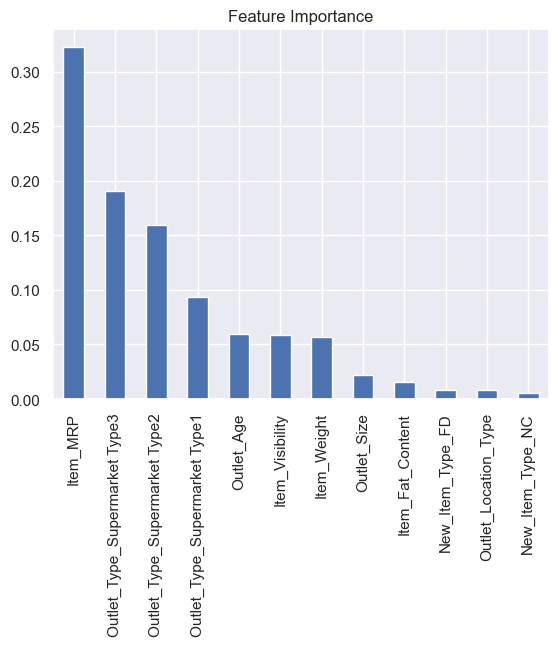

In [77]:
model = models[5][0]
coef = pd.Series(model.feature_importances_, X_train_df.columns).sort_values(ascending=False)
print(performances[5])
coef.plot(kind='bar', title="Feature Importance")
plt.show()

## Best model selection using GridSearch

In [104]:
performances.sort(key=lambda x: -x['CV R2'])
top_5 = performances[:6]
top_5.pop(2) # As Ridge with 0 penalty is simple LR
top_5 = [model['Model'] for model in top_5]

In [116]:
top_5_models = {}
for model in models:
    if model[1] in top_5:
        top_5_models[model[1]] = model[0]

In [119]:
top_5_models.keys()

dict_keys(['RidgeRegression', 'RandomForestRegressor', 'ExtraTreesRegressor', 'XGBoost', 'GradientBoostingRegressor'])

In [120]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [129]:
X =  np.vstack([X_train, X_test])
y = np.concatenate([y_train, y_test])

For XgBoost

In [132]:
optim_models = {}

In [133]:
model = top_5_models['XGBoost']

In [134]:
param_grid = {
    'n_estimators': [100, 200, 500],             # Number of trees
    'max_depth': [3, 5, 7, 10],                 # Maximum depth of a tree
    'learning_rate': [0.01, 0.05, 0.1, 0.2],    # Learning rate (eta)
    'subsample': [0.6, 0.8, 1.0],               # Fraction of samples for training each tree
    'colsample_bytree': [0.6, 0.8, 1.0],        # Fraction of features used per tree
    # 'gamma': [0, 1, 5],                         # Minimum loss reduction for further splits
    # 'reg_alpha': [0, 0.1, 1],                   # L1 regularization strength
    # 'reg_lambda': [1, 5, 10],                   # L2 regularization strength
    # 'min_child_weight': [1, 5, 10],             # Minimum sum of instance weight for child nodes
}

In [135]:
grid_search = GridSearchCV(estimator=model, param_grid=param_grid,
                           scoring='r2', cv=3,
                           verbose=1, n_jobs=-1)

In [136]:
grid_search.fit(X, y)

Fitting 3 folds for each of 432 candidates, totalling 1296 fits


C:\Users\Parag\anaconda3\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.6, 0.8, 1.0],
                         'learning_rate': [0.01, 0.05, 0.1, 0.2],
                         'max_depth': [3, 5, 7, 10],
                         'n_estimators': [100, 200, 500],
                         'subsample': [0.6, 0.8, 1.0]},
             scoring='r2', verbose=1)

In [137]:
print("Best parameters found: ", grid_search.best_params_)
print("Best score (r2 score): ", grid_search.best_score_)

Best parameters found:  {'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 200, 'subsample': 1.0}
Best score (neg MSE):  0.7449502754526892


In [138]:
optim_models['XGBoost'] = {
    "model_name": "XgBoost",
    "estimator": model,
    "Score": grid_search.best_score_
}

For Random Forest

In [139]:
model = top_5_models['RandomForestRegressor']

In [140]:
param_grid = {
    'n_estimators': [100, 200, 500],          # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],          # Maximum depth of a tree
    'min_samples_split': [2, 5, 10],          # Minimum number of samples to split a node
    'min_samples_leaf': [1, 2, 4],            # Minimum number of samples in a leaf node
    'max_features': ['auto', 'sqrt', 'log2'], # Number of features to consider when looking for the best split
    'bootstrap': [True, False],               # Whether to use bootstrapping
}

In [141]:
grid_search = GridSearchCV(estimator=model, param_grid=param_grid,
                           scoring='r2', cv=3,
                           verbose=1, n_jobs=-1)

In [142]:
grid_search.fit(X, y)

Fitting 3 folds for each of 648 candidates, totalling 1944 fits


C:\Users\Parag\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
648 fits failed out of a total of 1944.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
286 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Parag\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Parag\anaconda3\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\Parag\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\Parag\anaconda3\Lib\site-packa

GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 10, 20, 30],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 500]},
             scoring='r2', verbose=1)

In [143]:
print("Best parameters found: ", grid_search.best_params_)
print("Best score (r2 score): ", grid_search.best_score_)

Best parameters found:  {'bootstrap': True, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}
Best score (neg MSE):  0.7388537759040309


In [144]:
optim_models['RandomForestRegressor'] = {
    "model_name": "RandomForestRegressor",
    "estimator": model,
    "Score": grid_search.best_score_
}

RidgeRegression

In [145]:
model = top_5_models['RidgeRegression']

In [149]:
param_grid = {
    'alpha': [0.01, 0.1, 1, 10, 100],      # Regularization strength
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'saga'],  # Solvers for optimization
    'fit_intercept': [True, False],        # Whether to calculate the intercept for the model
}

In [150]:
grid_search = GridSearchCV(estimator=model, param_grid=param_grid,
                           scoring='r2', cv=5,
                           verbose=1, n_jobs=-1)

In [151]:
grid_search.fit(X, y)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


GridSearchCV(cv=5, estimator=Ridge(alpha=0.5), n_jobs=-1,
             param_grid={'alpha': [0.01, 0.1, 1, 10, 100],
                         'fit_intercept': [True, False],
                         'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'saga']},
             scoring='r2', verbose=1)

In [152]:
print("Best parameters found: ", grid_search.best_params_)
print("Best score (r2 score): ", grid_search.best_score_)

Best parameters found:  {'alpha': 0.1, 'fit_intercept': True, 'solver': 'saga'}
Best score (neg MSE):  0.7182918531976773


In [153]:
optim_models['RidgeRegression'] = {
    "model_name": "RidgeRegression",
    "estimator": model,
    "Score": grid_search.best_score_
}

ExtraTreesRegressor

In [154]:
model = top_5_models['ExtraTreesRegressor']

In [155]:
param_grid = {
    'n_estimators': [100, 200, 500],          # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],          # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],          # Minimum number of samples to split a node
    'min_samples_leaf': [1, 2, 4],            # Minimum number of samples in a leaf node
    'max_features': ['auto', 'sqrt', 'log2'], # Number of features to consider when looking for the best split
    'bootstrap': [True, False],               # Whether to use bootstrapping
    'criterion': ['squared_error', 'absolute_error'], # Function to measure quality of a split
}


In [156]:
grid_search = GridSearchCV(estimator=model, param_grid=param_grid,
                           scoring='r2', cv=3,
                           verbose=1, n_jobs=-1)

In [157]:
grid_search.fit(X, y)

Fitting 3 folds for each of 1296 candidates, totalling 3888 fits


C:\Users\Parag\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
1296 fits failed out of a total of 3888.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
719 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Parag\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Parag\anaconda3\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\Parag\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\Parag\anaconda3\Lib\site-pack

GridSearchCV(cv=3, estimator=ExtraTreesRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['squared_error', 'absolute_error'],
                         'max_depth': [None, 10, 20, 30],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 500]},
             scoring='r2', verbose=1)

In [158]:
print("Best parameters found: ", grid_search.best_params_)
print("Best score (r2 score): ", grid_search.best_score_)

Best parameters found:  {'bootstrap': False, 'criterion': 'squared_error', 'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
Best score (neg MSE):  0.7342302767014913


In [159]:
optim_models['ExtraTreesRegressor'] = {
    "model_name": "ExtraTreesRegressor",
    "estimator": model,
    "Score": grid_search.best_score_
}

GradientBoostingRegressor

In [178]:
model = top_5_models['GradientBoostingRegressor']

In [180]:
param_grid = {
    'n_estimators': [100, 200, 500],             # Number of boosting stages
    'learning_rate': [0.01, 0.05, 0.1, 0.2],    # Shrinks contribution of each tree
    'max_depth': [3, 5, 7, 10],                 # Maximum depth of a tree
    'min_samples_split': [2, 5, 10],            # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],              # Minimum number of samples in a leaf node
    'max_features': ['auto', 'sqrt', 'log2'],   # Number of features considered for the best split
    'subsample': [0.6, 0.8, 1.0],               # Fraction of samples used for fitting individual base learners
}


In [181]:
grid_search = GridSearchCV(estimator=model, param_grid=param_grid,
                           scoring='r2', cv=3,
                           verbose=1, n_jobs=-1)

In [182]:
grid_search.fit(X, y)

Fitting 3 folds for each of 3888 candidates, totalling 11664 fits


C:\Users\Parag\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
3888 fits failed out of a total of 11664.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2237 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Parag\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Parag\anaconda3\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\Parag\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\Parag\anaconda3\Lib\site-pa

GridSearchCV(cv=3, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1, 0.2],
                         'max_depth': [3, 5, 7, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 500],
                         'subsample': [0.6, 0.8, 1.0]},
             scoring='r2', verbose=1)

In [183]:
print("Best parameters found: ", grid_search.best_params_)
print("Best score (r2 score): ", grid_search.best_score_)

Best parameters found:  {'learning_rate': 0.01, 'max_depth': 5, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 500, 'subsample': 0.6}
Best score (neg MSE):  0.743676702424381


In [184]:
optim_models['GradientBoostingRegressor'] = {
    "model_name": "GradientBoostingRegressor",
    "estimator": model,
    "Score": grid_search.best_score_
}

In [185]:
optim_models_df = pd.DataFrame(optim_models.values())

In [186]:
optim_models_df

,model_name,estimator,Score
0,XgBoost,"XGBRegressor(base_score=None, booster=None, ca...",0.744950
1,RandomForestRegressor,"(DecisionTreeRegressor(max_features=1.0, rando...",0.738854
2,RidgeRegression,Ridge(alpha=0.5),0.718292
3,ExtraTreesRegressor,"(ExtraTreeRegressor(random_state=986160637), E...",0.734230
4,GradientBoostingRegressor,([DecisionTreeRegressor(criterion='friedman_ms...,0.743677


In [187]:
import pickle

In [221]:
with open("artifacts/optim_models_df.pkl", "wb") as file:
    pickle.dump(optim_models_df,file)

### XGBoost performs best in all
More Fine tuning

In [237]:
from xgboost import XGBRegressor

In [238]:
final_model = XGBRegressor()

In [243]:
final_model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [244]:
param_grid = {
    'n_estimators': [100, 200, 500],             # Number of trees
    'max_depth': [3, 5, 7, 10],                 # Maximum depth of a tree
    'learning_rate': [0.01, 0.05, 0.1, 0.2],    # Learning rate (eta)
    'subsample': [0.6, 0.8, 1.0],               # Fraction of samples for training each tree
    'colsample_bytree': [0.6, 0.8, 1.0],        # Fraction of features used per tree
    'gamma': [0, 1, 5],                         # Minimum loss reduction for further splits
    'reg_alpha': [0, 0.1, 1],                   # L1 regularization strength
    'reg_lambda': [1, 5, 10],                   # L2 regularization strength
    'min_child_weight': [1, 5, 10],             # Minimum sum of instance weight for child nodes
}

In [246]:
grid_search = GridSearchCV(estimator=final_model, param_grid=param_grid,
                           scoring='r2', cv=3,
                           verbose=1, n_jobs=-1)

In [247]:
grid_search.fit(X, y)

Fitting 3 folds for each of 34992 candidates, totalling 104976 fits


GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.6, 0.8, 1.0],
                         'gamma': [0, 1, 5],
                         'learning_rate': [0.01, 0.05, 0.1, 0.2],
                         'max_depth': [3, 5, 7, 10],
                         'min_child_weight': [1, 5, 10],
                         'n_estimators': [100, 200, 500],
                         'reg_alpha': [0, 0.1, 1], 'reg_lambda': [1, 5, 10],
                         'subsample': [0.6, 0.8, 1.0]},
             scoring='r2', verbose=1)

In [249]:
print("Best parameters found: ", grid_search.best_params_)
print("Best score (r2 score): ", grid_search.best_score_)

Best parameters found:  {'colsample_bytree': 1.0, 'gamma': 0, 'learning_rate': 0.01, 'max_depth': 5, 'min_child_weight': 10, 'n_estimators': 500, 'reg_alpha': 0.1, 'reg_lambda': 10, 'subsample': 0.6}
Best score (r2 score):  0.7472381917108027


In [250]:
# with open("artifacts/best_model.pkl", "wb") as file:
#     pickle.dump(grid_search.best_estimator_,file)

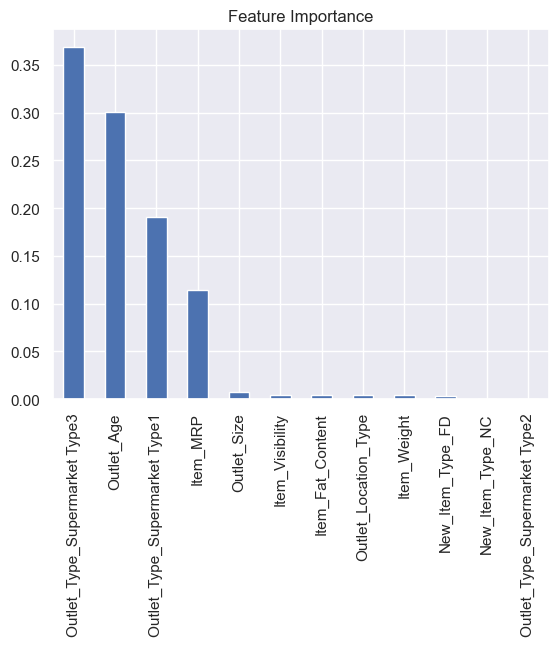

In [251]:
model = grid_search.best_estimator_
coef = pd.Series(model.feature_importances_, X_train_df.columns).sort_values(ascending=False)
coef.plot(kind='bar', title="Feature Importance")
plt.show()